# The Transportation Problem
This is example how to solve transpartation problem using IBM CPLEX optimizer

In [7]:
from docplex.mp.model import Model

tm = Model(name='transportation')

capacities = {1: 15, 2: 20}
demands = {3: 7, 4: 10, 5: 15}
costs = {(1,3): 2, (1,5):4, (2,4):5, (2,5):3}

# Python ranges will be used to iterate on source, target nodes.
source = range(1, 3) # {1, 2}
target = range(3, 6) # {3,4,5}


In [4]:
# create flow variables for each couple of nodes
# x(i,j) is the flow going out of node i to node j
x = {(i,j): tm.continuous_var(name='x_{0}_{1}'.format(i,j)) for i in source for j in target}

# each arc comes with a cost. Minimize all costed flows
tm.minimize(tm.sum(x[i,j]*costs.get((i,j), 0) for i in source for j in target))

tm.print_information()

Model: transportation
 - number of variables: 6
   - binary=0, integer=0, continuous=6
 - number of constraints: 0
   - linear=0
 - parameters: defaults
 - problem type is: LP


In [5]:
# for each node, total outgoing flow must be smaller than available quantity
for i in source:
    tm.add_constraint(tm.sum(x[i,j] for j in target) <= capacities[i])
    
# for each target node, total ingoing flow must be greater thand demand
for j in target:
    tm.add_constraint(tm.sum(x[i,j] for i in source) >= demands[j])

In [6]:
tm.minimize(tm.sum(x[i,j]*costs.get((i,j), 0)))

In [8]:
tms = tm.solve()
assert tms
tms.display()

solution for: transportation
objective: 0.000
x_1_5 = 15.000
x_2_3 = 10.000
x_2_4 = 10.000


# Max Clique Problem
Converting NP hard task to linear one

Problem formulation: We have some not oriented graph and we want to find maximum clique in it.

In [2]:
try:
    import networkx as nx
except: 
    !pip install networkx
G = nx.Graph()

In [3]:
with open('DIMACS_all_ascii\C125.9.clq') as f:
    edges = [l[1:].strip().split() for l in f]
edges = [(int(v1),int(v2)) for v1,v2 in edges]
G.add_edges_from(edges)

Inspect and visualize graph

In [4]:
print('number_of_edges:', G.number_of_edges())
print('number_of_nodes:', G.number_of_nodes())

number_of_edges: 6963
number_of_nodes: 125


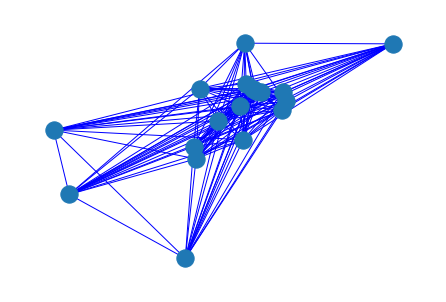

In [5]:
import matplotlib
G2 = nx.subgraph(G, [i for i in range(20)])
nx.draw(G2,pos=nx.spectral_layout(G), edge_color='b')

In [8]:
cp = Model(name='Max clique problem')

Since our graph is not oriented we need to set constraints for (i,j) as wel as for (j,i)

In [9]:
# binary variables for nodes
y = {i: cp.binary_var(name='y_{0}'.format(i)) for i in G.nodes()}

# adding constraints
for i in G.nodes():
    for j in G.nodes():
        if (i,j) not in G.edges() and (j,i) not in G.edges() and i!=j:
            cp.add_constraint((y[i] + y[j]) <= 1)

In [10]:
cp.maximize(cp.sum(y[i] for i in G.nodes()))

In [11]:
# get the solution
cps = cp.solve()
assert cps
cps.display()

solution for: Max clique problem
objective: 34
y_2 = 1
y_1 = 1
y_5 = 1
y_7 = 1
y_9 = 1
y_11 = 1
y_17 = 1
y_18 = 1
y_19 = 1
y_25 = 1
y_29 = 1
y_31 = 1
y_34 = 1
y_40 = 1
y_44 = 1
y_47 = 1
y_48 = 1
y_49 = 1
y_54 = 1
y_70 = 1
y_71 = 1
y_77 = 1
y_79 = 1
y_80 = 1
y_93 = 1
y_101 = 1
y_110 = 1
y_114 = 1
y_115 = 1
y_117 = 1
y_121 = 1
y_122 = 1
y_123 = 1
y_125 = 1


In [13]:
cp.print_information()

Model: Max clique problem
 - number of variables: 125
   - binary=125, integer=0, continuous=0
 - number of constraints: 1574
   - linear=1574
 - parameters: defaults
 - problem type is: MILP


So, we maximize objective and got set of the 34 vertices 